<h4 align="center">Jian Sun</h4>
<h4 align="center">DUID: 873397832</h4>

# CONTENT
- Introduction
- Data Exploration
- Model
- Conclusion
- Appendix

# Introduction
Image Demosaicing method is a very practical method, since blurred images are common. Currently, interpolation methods are useful to do demosaic. This report focuses on bilinear interpolation demosaicing method and proposed interpolation demosaicing method, and separately enhances 4 bayer-mosaic pattern images. The adjusting results will be compared to decide which is the better interpolation approach. The evaluation values are Mean Square Error (MSE) and Peak Signal to Noise Ratio (PSNR).

# Data Exploration
The selected dataset are divided into 2 groups. One group is bayer-mosaic one, which includes officeBayer.png, onionBayer.png, pearsBayer.png and peppersBayer.png, the other one is original colorful one, which includes office_4.png, onion.png, pears.png and peppers.png.

The size of each image is:

|Name        |Row    |Column |Layer
|:-----------|:-----:|:-----:|----:
|officeBayer |600    |903    |1        
|office_4    |600    |903    |3
|onionBayer  |135    |198    |1
|onion       |135    |198    |3
|pearsBayer  |486    |732    |1
|pears       |486    |732    |3
|peppersBayer|384    |512    |1
|peppers     |384    |512    |3

For an image in bayer pattern, it's RGB locates on the same layer. The order is BGGR, and Blue pixel locates on the (even row, even column), Green pixel locates on the (odd row, even column) or (even row, odd column), Red pixel locates on the (odd row, odd column).

# Model

## Bilinear Interpolation Method
In this method, the green value g(i,j) at a pixel position (i,j) that falls in a red or blue pixel, is computed by the average of the neighboring green values in a cross pattern.

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$\hat{g}(i,j)=\frac{1}{4}\sum g(i+m,j+n)$$
$$(m,n)=\{(0,-1),(0,1),(-1,0),(1,0)\}$$

At image boundaries, only pixels that fall within the image are included, and the scaling adjusted. 

For the R and B colors the same equation applies (with a diagonal cross pattern), except that for pixel positions (i,j) that fall in a green pixel only two red neighboring values are averaged to produce an interpolated red value; the same holds for blue. 

If blue value falls in a red pixel,
$$\hat{b}(i,j)=\frac{1}{4}\sum b(i+m,j+n)$$
$$(m,n)=\{(-1,-1),(-1,1),(1,-1),(1,1)\}$$
If red value falls in a blue pixel,
$$\hat{r}(i,j)=\frac{1}{4}\sum r(i+m,j+n)$$
$$(m,n)=\{(-1,-1),(-1,1),(1,-1),(1,1)\}$$
If blue value falls in a green pixel,
$$\hat{b}(i,j)=\frac{1}{2}\sum b(i+m,j+n)$$
$$(m,n)=\{(-1,0),(1,0)\}\ or\ (m,n)=\{(0,-1),(0,1)\}$$
If red value falls in a green pixel,
$$\hat{r}(i,j)=\frac{1}{2}\sum r(i+m,j+n)$$
$$(m,n)=\{(-1,0),(1,0)\}\ or\ (m,n)=\{(0,-1),(0,1)\}$$

## Proposed Interpolation Method
In this method, when we calculate the green value at a red pixel location, we don’t discard the red value at that location. Rather, we use red value minus bilinear interpolation for the nearest red samples and plus bilinear interpolation for the nearest green value. 
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

$$\hat{g}(i,j)=\hat{g}_{B}(i,j)+\alpha\Delta_{R}(i,j)$$
\\(\hat{g}_{B}(i,j)\\) here means bilinearly interpolated as we did in bilinear interpolation.
$$\Delta_{R}(i,j)=r(i,j)-\frac{1}{4}\sum r(i+m,j+n)$$
$$\alpha =\frac{1}{2}\ \ \ (m,n)=\{(0,-2),(0,2),(-2,0),(2,0)\}$$

For interpolating Green at blue pixels, the same formula is used, but corrected by \\(\Delta_{B}(i,j)\\).

$$\hat{g}(i,j)=\hat{g}_{B}(i,j)+\alpha\Delta_{B}(i,j)$$
$$\Delta_{B}(i,j)=b(i,j)-\frac{1}{4}\sum b(i+m,j+n)$$
$$\alpha =\frac{1}{2}\ \ \ (m,n)=\{(0,-2),(0,2),(-2,0),(2,0)\}$$

For interpolating Red and Blue at green pixels (odd row and even column), we use the formula,

$$\hat{r}(i,j)=\hat{r}_{B}(i,j)+\beta\Delta_{G}(i,j)$$
$$\Delta_{G}(i,j)=g(i,j)-\frac{1}{5}\sum g(i+m,j+n)+\frac{1}{10}\sum g(i+p,j+q)$$
$$\beta =\frac{5}{8}\ \ \ (m,n)=\{(0,-2),(0,2),(-1,-1),(1,-1),(-1,1),(1,1)\}$$
$$(p,q)=\{(-2,0),(2,0)\}$$

$$\hat{b}(i,j)=\hat{b}_{B}(i,j)+\beta\Delta_{G}(i,j)$$
$$\Delta_{G}(i,j)=g(i,j)-\frac{1}{5}\sum g(i+m,j+n)+\frac{1}{10}\sum g(i+p,j+q)$$
$$\beta =\frac{5}{8}\ \ \ (m,n)=\{(-2,0),(2,0),(-1,-1),(1,-1),(-1,1),(1,1)\}$$
$$(p,q)=\{(0,-2),(0,2)\}$$

For interpolating Red and Blue at green pixels (even row and odd column), we use the formula,

$$\hat{b}(i,j)=\hat{b}_{B}(i,j)+\beta\Delta_{G}(i,j)$$
$$\Delta_{G}(i,j)=g(i,j)-\frac{1}{5}\sum g(i+m,j+n)+\frac{1}{10}\sum g(i+p,j+q)$$
$$\beta =\frac{5}{8}\ \ \ (m,n)=\{(0,-2),(0,2),(-1,-1),(1,-1),(-1,1),(1,1)\}$$
$$(p,q)=\{(-2,0),(2,0)\}$$

$$\hat{r}(i,j)=\hat{r}_{B}(i,j)+\beta\Delta_{G}(i,j)$$
$$\Delta_{G}(i,j)=g(i,j)-\frac{1}{5}\sum g(i+m,j+n)+\frac{1}{10}\sum g(i+p,j+q)$$
$$\beta =\frac{5}{8}\ \ \ (m,n)=\{(-2,0),(2,0),(-1,-1),(1,-1),(-1,1),(1,1)\}$$
$$(p,q)=\{(0,-2),(0,2)\}$$

For interpolating Red at blue pixels, we use the formula,

$$\hat{r}(i,j)=\hat{r}_{B}(i,j)+\gamma\Delta_{B}(i,j)$$
$$\Delta_{B}(i,j)=b(i,j)-\frac{1}{4}\sum b(i+m,j+n)$$
$$\gamma =\frac{3}{4}\ \ \ (m,n)=\{(0,-2),(0,2),(-2,0),(2,0)\}$$

For interpolating Blue at Red pixels, we use the formula,

$$\hat{b}(i,j)=\hat{b}_{B}(i,j)+\gamma\Delta_{R}(i,j)$$
$$\Delta_{R}(i,j)=r(i,j)-\frac{1}{4}\sum r(i+m,j+n)$$
$$\gamma =\frac{3}{4}\ \ \ (m,n)=\{(0,-2),(0,2),(-2,0),(2,0)\}$$

## MSE and PSNR
The Mean Square Error(MSE) and Peak Signal to Noise Ratio (PSNR) are introduced here to evaluate the above algorithm.

$$MSE=\frac{\sum [I_{1}(m,n)-I_{2}(m,n)]^2}{M*N}$$
$$PSNR=10log_{10}(\frac{R^2}{MSE})$$

Where \\(I_{1}\\) is the original image and the \\(I_{2}\\) is the demosiced image. R is the maximum fluctuation in the input image data type. For example, if the input image has a double-precision floating-point data type, then R is 1. If it has an 8-bit unsigned integer data type, R is 255, etc.

The smaller the MSE is, the higher the accuracy the algorithm is.
The higher the PSNR is, the higher the accuracy the algorithm is.

## Flowchart

(Text(0.5, 1.0, 'Flowchart'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

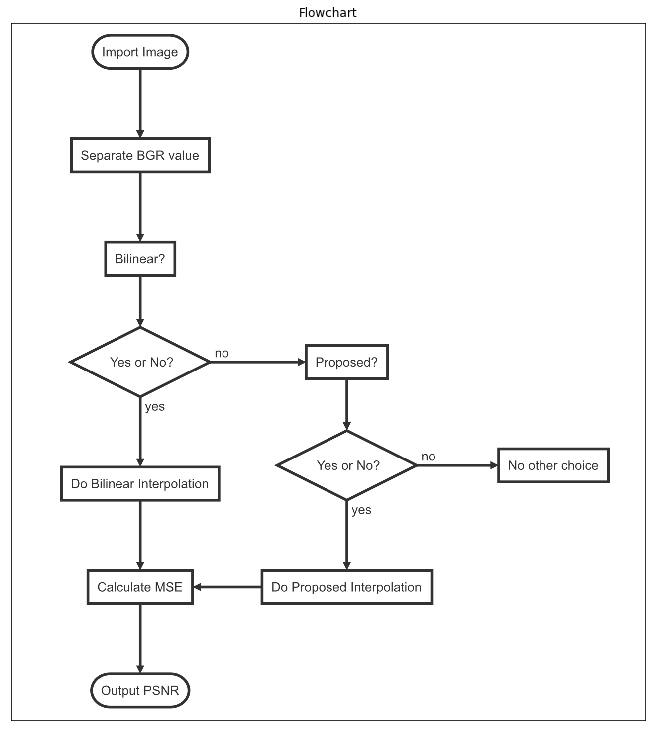

In [31]:
import cv2
from matplotlib import pyplot as plt 
fc = cv2.imread('./xiao.png')
plt.figure(figsize=(25,25))
plt.subplot(121),plt.imshow(fc)
plt.title('Flowchart'), plt.xticks([]), plt.yticks([])

# Conclusion
We select python here to code above algorithm out. 
The followings are images from original one and two interpolation methods.

(Text(0.5, 1.0, 'Proposed Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

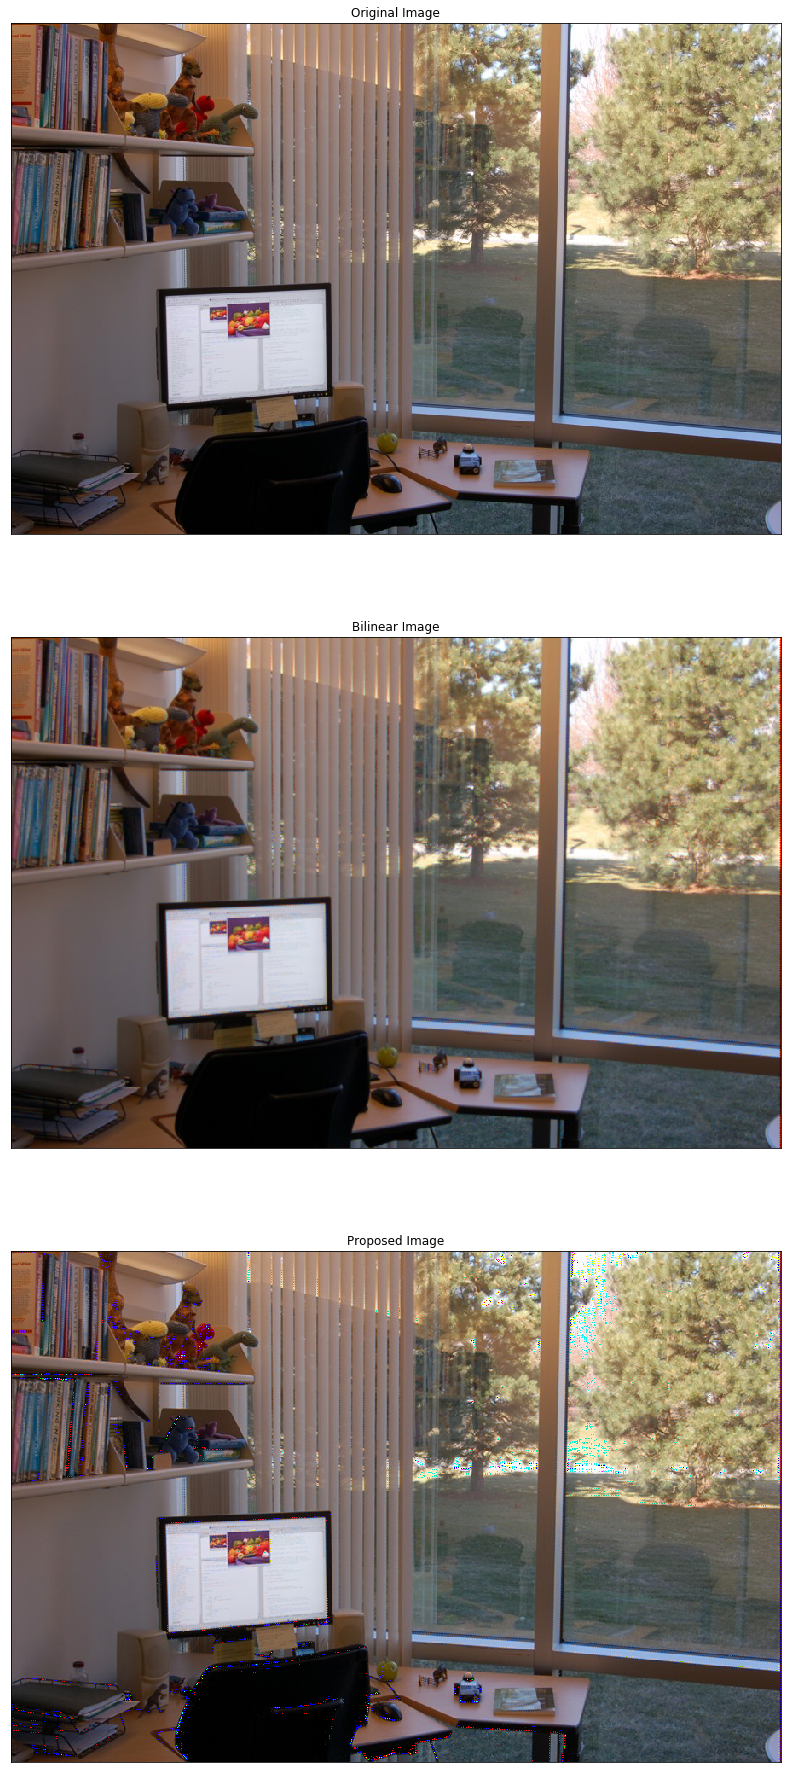

In [43]:
def BGR2RGB(Input):
   output = np.zeros(Input.shape);
   output[:,:,0] = Input[:,:,2] 
   output[:,:,1] = Input[:,:,1] 
   output[:,:,2] = Input[:,:,0]
   output = output.astype('uint8')
   return output
pic_ori = cv2.imread('./images/origin/Office.png')
pic_bil = cv2.imread('./Bi_Office.png')
pic_pro = cv2.imread('./Pr_Office.png')
# plot the image out
plt.figure(figsize=(50,32))
plt.subplot(311),plt.imshow(BGR2RGB(pic_ori))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(BGR2RGB(pic_bil))
plt.title('Bilinear Image'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(BGR2RGB(pic_pro))
plt.title('Proposed Image'), plt.xticks([]), plt.yticks([])

/Users/sunjian/anaconda3/envs/tfw/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(Text(0.5, 1.0, 'Proposed Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

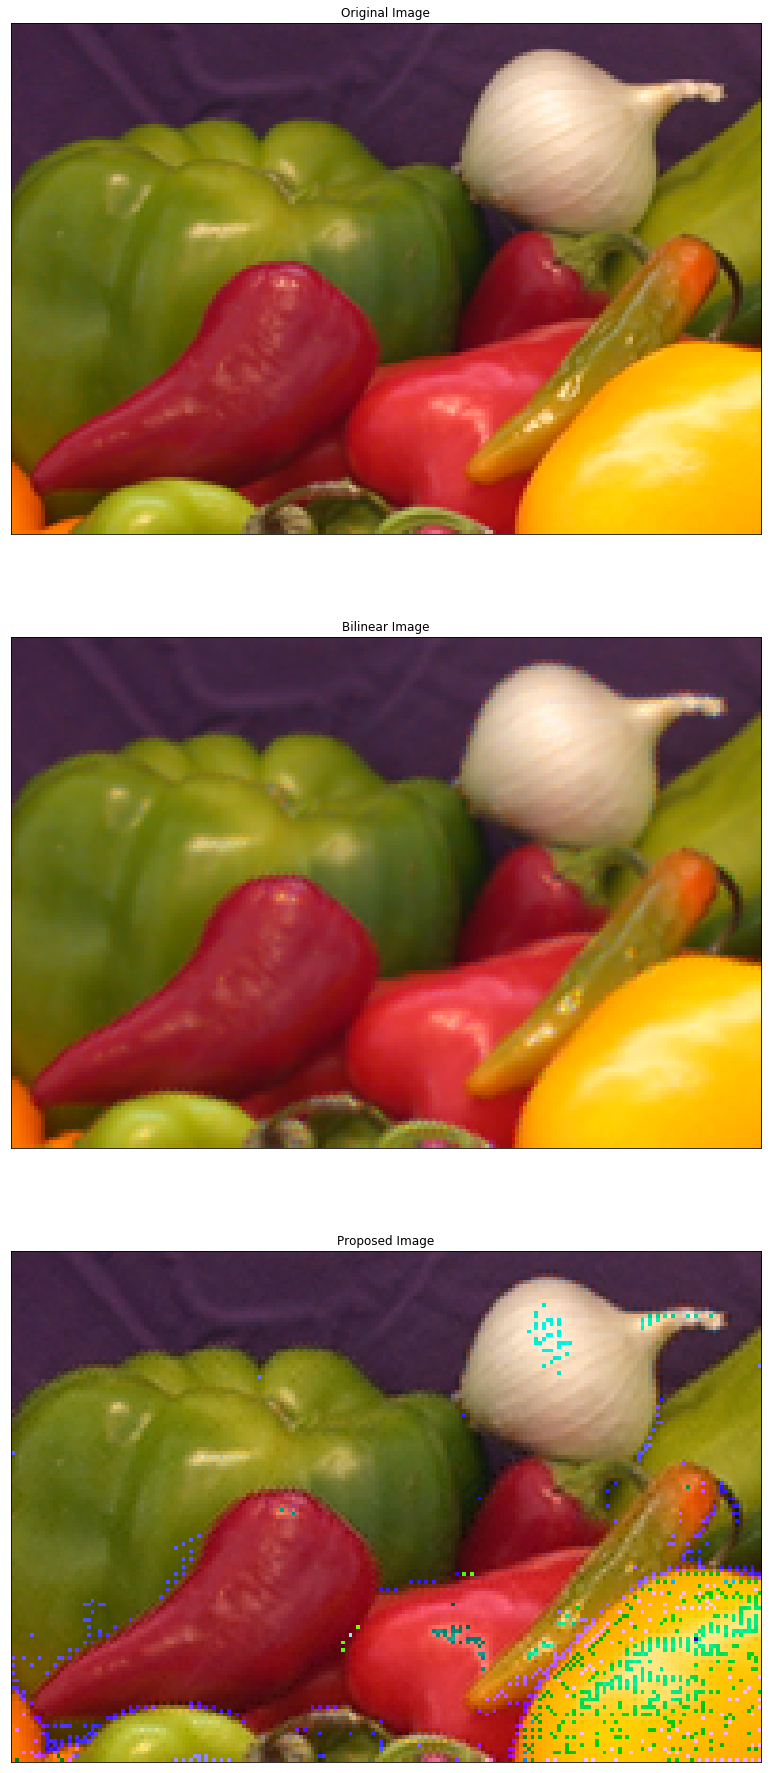

In [37]:
pic_ori = cv2.imread('./images/origin/Onion.png')
pic_bil = cv2.imread('./Bi_Onion.png')
pic_pro = cv2.imread('./Pr_Onion.png')
# plot the image out
plt.figure(figsize=(50,32))
plt.subplot(311),plt.imshow(BGR2RGB(pic_ori))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(BGR2RGB(pic_bil))
plt.title('Bilinear Image'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(BGR2RGB(pic_pro))
plt.title('Proposed Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Proposed Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

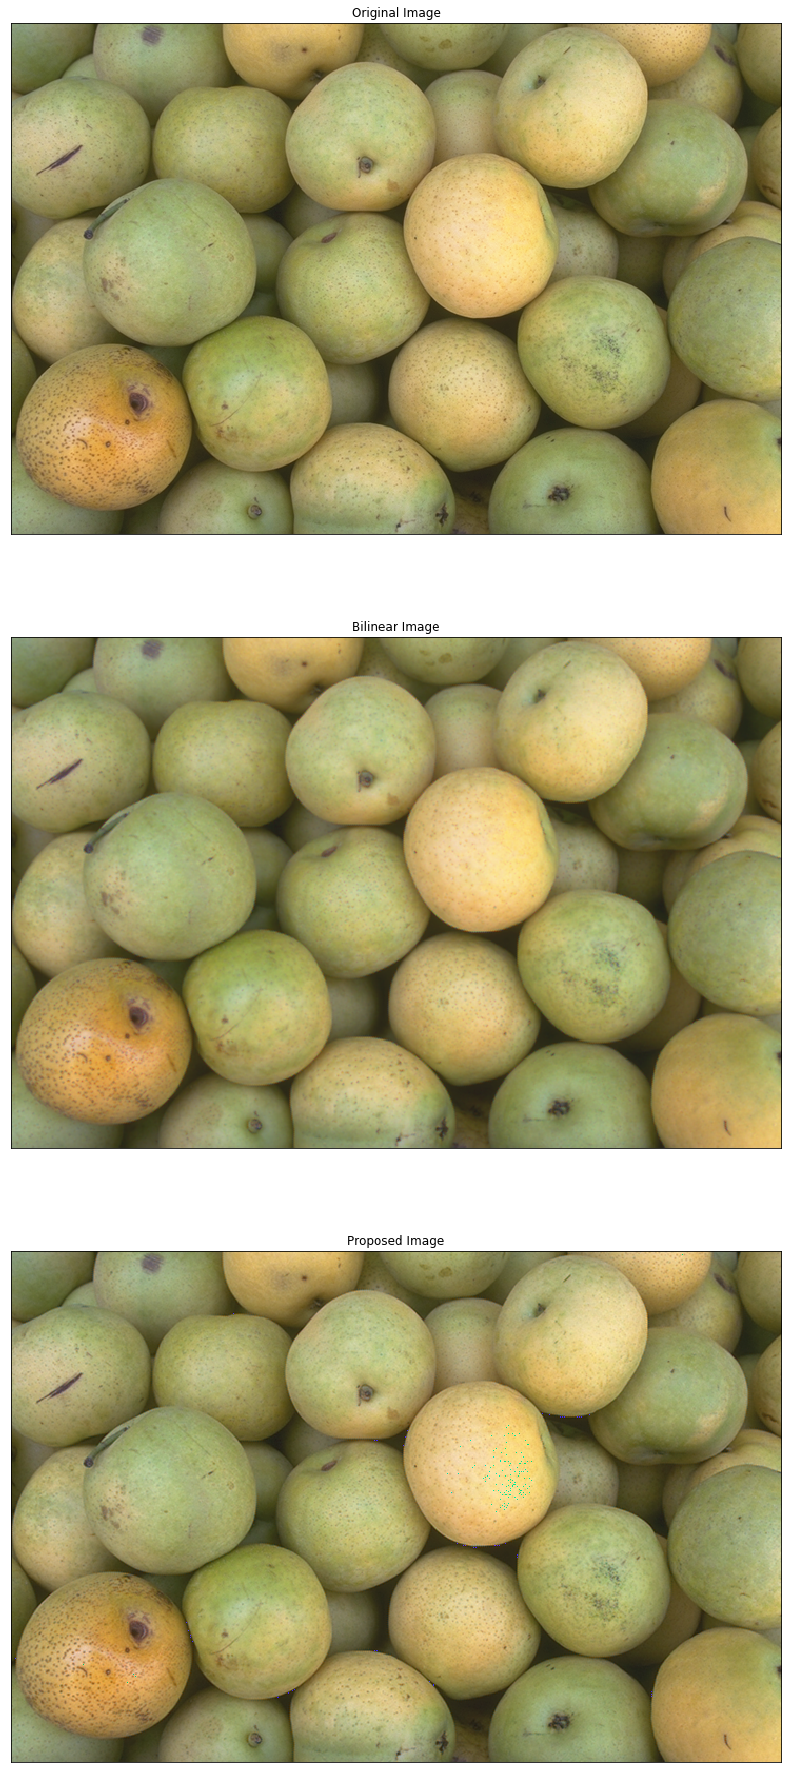

In [38]:
pic_ori = cv2.imread('./images/origin/Pears.png')
pic_bil = cv2.imread('./Bi_Pears.png')
pic_pro = cv2.imread('./Pr_Pears.png')
# plot the image out
plt.figure(figsize=(50,32))
plt.subplot(311),plt.imshow(BGR2RGB(pic_ori))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(BGR2RGB(pic_bil))
plt.title('Bilinear Image'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(BGR2RGB(pic_pro))
plt.title('Proposed Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Proposed Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

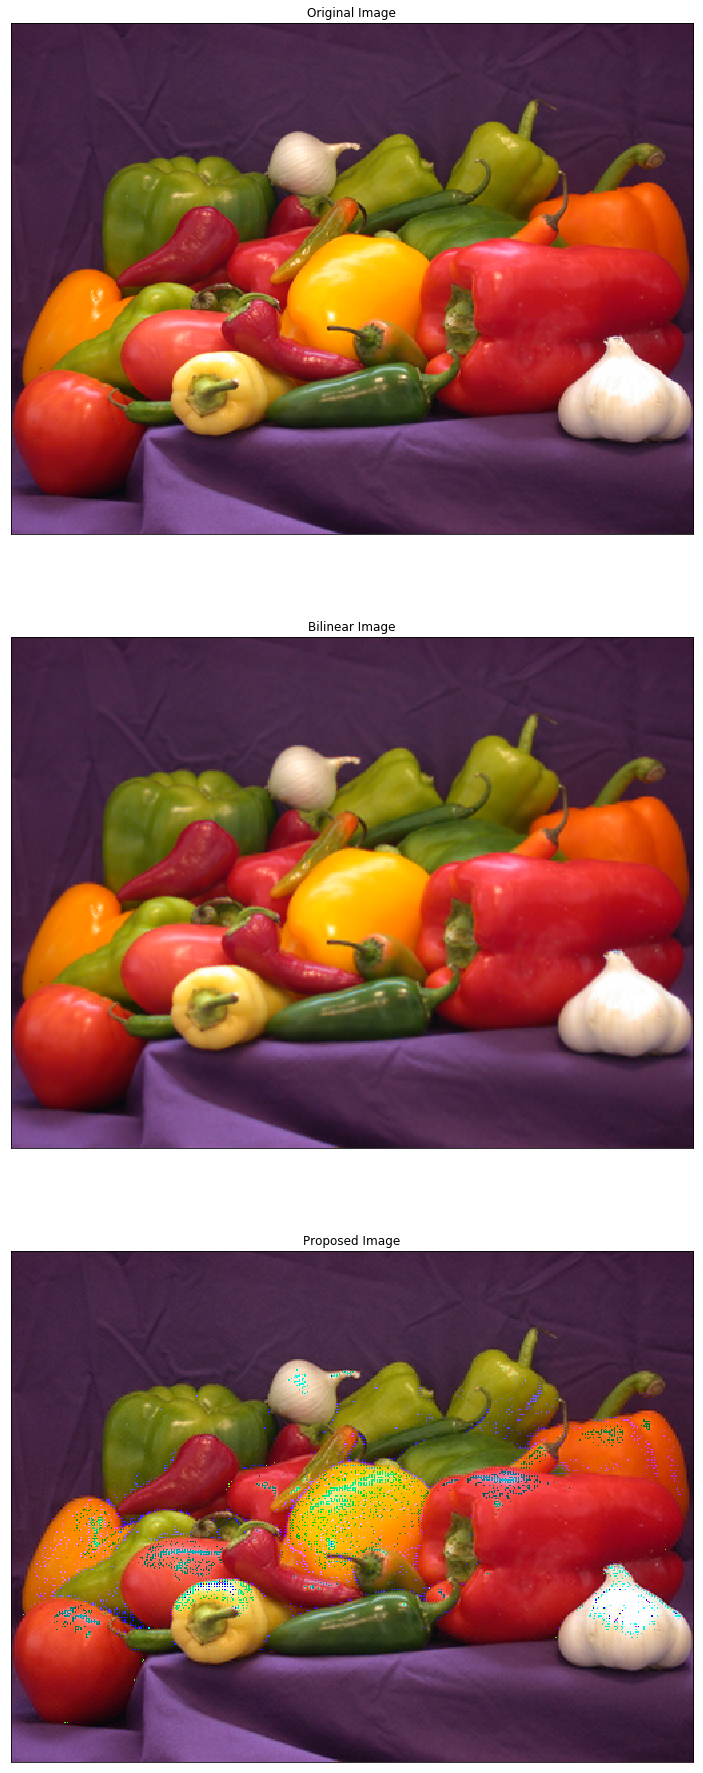

In [39]:
pic_ori = cv2.imread('./images/origin/Peppers.png')
pic_bil = cv2.imread('./Bi_Peppers.png')
pic_pro = cv2.imread('./Pr_Peppers.png')
# plot the image out
plt.figure(figsize=(50,32))
plt.subplot(311),plt.imshow(BGR2RGB(pic_ori))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(BGR2RGB(pic_bil))
plt.title('Bilinear Image'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(BGR2RGB(pic_pro))
plt.title('Proposed Image'), plt.xticks([]), plt.yticks([])


The MSE values for RGB value in each image are displayed below,

Method  | Pixel | office | onion | pears | peppers
:-------|:------|:------:|:-----:|:-----:|:-------:
Bilinear|Blue   | 21.78  | 16.47 | 11.52 | 9.83
Proposed|Blue   | 19.83  | 19.93 | 6.92  | 12.13
Bilinear|Green  | 11.14  | 7.15  | 5.61  | 3.66
Proposed|Green  | 6.03   | 7.47  | 2.09  | 4.44
Bilinear|Red    | 20.53  | 12.27 | 10.36 | 7.76
Proposed|Red    | 19.25  | 16.85 | 6.91  | 10.80

The PSNR values for RGB value in each image are displayed below,

Method  | Pixel | office | onion | pears | peppers
:-------|:------|:------:|:-----:|:-----:|:-------:
Bilinear|Blue   | 34.75  | 35.96 | 37.51 | 37.29
Proposed|Blue   | 35.16  | 35.14 | 39.73 | 32.54
Bilinear|Green  | 37.66  | 39.59 | 40.64 | 42.50
Proposed|Green  | 40.33  | 39.40 | 44.93 | 41.66
Bilinear|Red    | 35.00  | 37.24 | 37.98 | 39.23
Proposed|Red    | 35.29  | 35.87 | 39.74 | 37.80

According to above charts and images, we can find that Bilinear Interpolation Method performs better than Proposed Interpolation Method for image Onion.png and image Peppers.png, since it's MSE value for each RGB is smaller than Proposed's and it's PSNR value of each RGB is higher than Proposed's. The displayed images also prove this conclusion.  
In a meanwhile, Proposed Interpolation Method performs better than Bilinear Interpolation Method for image Office.png and image Pears.png, since it's MSE value for each RGB is smaller than Bilinear's and it's PSNR value of each RGB is higher than Bilinear's. The displayed images also prove this conclusion.

Hence, the Bilinear Interpolation Method and Proposed Interpolation Method are equally good approach. Their performance depends on image itself.

***


# Appendix

## Import Packages

In [1]:
import os
import cv2
import sys
import math
import time
import numpy as np 
from PIL import Image
from os import listdir
from imutils import paths
from matplotlib import pyplot as plt 

## Interpolation Algorithm Part
### Bilinear Interpolation Method 

In [2]:
def bilinear_inter(pic,Blue,Red,Green):
    for i in range(1,pic.shape[0]-1):
        for j in range(1,pic.shape[1]-1):
            #fall in blue pixel
            if ((i%2!=0) and (j%2!=0)):
                Blue[i-1,j-1]=pic[i,j]
                Gwait_for_plus=[pic[i,j-1],pic[i,j+1],
                                pic[i-1,j],pic[i+1,j]]
                Rwait_for_plus=[pic[i-1,j-1],pic[i-1,j+1],
                                pic[i+1,j-1],pic[i+1,j+1]]
                Gcount,Rcount,r,g=0,0,0,0
                for k in range(4):
                    if Rwait_for_plus[k]>=0:
                        r=r+Rwait_for_plus[k]
                        Rcount=Rcount+1.0
                    else:
                        r=r+0
                Red[i-1,j-1]=r/Rcount
                for k in range(4):
                    if Gwait_for_plus[k]>=0:
                        g=g+Gwait_for_plus[k]
                        Gcount=Gcount+1.0
                    else:
                        g=g+0
                Green[i-1,j-1]=g/Gcount                 
            #fall in green pixel
            elif ((i%2==0) and (j%2!=0)) or ((i%2!=0) and (j%2==0)):
                Green[i-1,j-1]=pic[i,j]
                #odd row
                if (i%2!=0):
                    Bwait_for_plus=[pic[i,j-1],pic[i,j+1]]
                    Rwait_for_plus=[pic[i-1,j],pic[i+1,j]] 
                    Rcount,Bcount,b,r=0,0,0,0
                    for k in range(2):
                        if Rwait_for_plus[k]>=0:
                            r=r+Rwait_for_plus[k]
                            Rcount=Rcount+1.0
                        else:
                            r=r+0
                    Red[i-1,j-1]=r/Rcount 
                    for k in range(2):
                        if Bwait_for_plus[k]>=0:
                            b=b+Bwait_for_plus[k]
                            Bcount=Bcount+1.0
                        else:
                            b=b+0
                    Blue[i-1,j-1]=b/Bcount 
                #even row
                elif (i%2==0):
                    Bwait_for_plus=[pic[i-1,j],pic[i+1,j]]
                    Rwait_for_plus=[pic[i,j-1],pic[i,j+1]] 
                    Rcount,Bcount,b,r=0,0,0,0
                    for k in range(2):
                        if Rwait_for_plus[k]>=0:
                            r=r+Rwait_for_plus[k]
                            Rcount=Rcount+1.0
                        else:
                            r=r+0
                    Red[i-1,j-1]=r/Rcount 
                    for k in range(2):
                        if Bwait_for_plus[k]>=0:
                            b=b+Bwait_for_plus[k]
                            Bcount=Bcount+1.0
                        else:
                            b=b+0
                    Blue[i-1,j-1]=b/Bcount 
                else:
                    print('Wrong at point %d,%d' % (i,j))
            #fall in red pixel
            elif ((i%2==0) and (j%2==0)):
                Red[i-1,j-1]=pic[i,j]    
                Gwait_for_plus=[pic[i,j-1],pic[i,j+1],
                                pic[i-1,j],pic[i+1,j]]
                Bwait_for_plus=[pic[i-1,j-1],pic[i-1,j+1],
                                pic[i+1,j-1],pic[i+1,j+1]]
                Gcount,Bcount,b,g=0,0,0,0
                for k in range(4):
                    if Gwait_for_plus[k]>=0:
                        g=g+Gwait_for_plus[k]
                        Gcount=Gcount+1.0
                    else:
                        g=g+0
                Green[i-1,j-1]=g/Gcount 
                for k in range(4):
                    if Bwait_for_plus[k]>=0:
                        b=b+Bwait_for_plus[k]
                        Bcount=Bcount+1.0
                    else:
                        b=b+0
                Blue[i-1,j-1] =b/Bcount
            else:
                print('Wrong at point %d,%d' % (i,j))
    print("The adjusted Blue pixel value:")
    print(Blue)
    print("The adjusted Green pixel value:")
    print(Green)
    print("The adjusted Red pixel value:")
    print(Red)      
    return (Blue,Green,Red)


### Add One Layer Boundary for Bilinear Interpolation

In [3]:
def add_boundary1(pic_goal):    
    # add a -1 boundary for target image
    x = np.ones((pic_goal.shape[0],pic_goal.shape[1]))
    for i in range(pic_goal.shape[0]):
        for j in range(pic_goal.shape[1]):
            x[i,j]=pic_goal[i,j]
    adjust1 = np.pad(array=x, pad_width=1, mode ='constant', 
                     constant_values = -1.0)
    print("The shape of adjusted image:",np.shape(adjust1))
    return adjust1

### Proposed Interpolation Method 

In [4]:
# definite some functions to points at different positions
# blue and green value at red pixel
def BG_at_R(p,i,j):
    b_point_list=[p[i-1,j-1],p[i-1,j+1],p[i+1,j-1],p[i+1,j+1]]
    g_point_list=[p[i,j-1],p[i,j+1],p[i-1,j],p[i+1,j]]
    r_point_list=[p[i,j-2],p[i,j+2],p[i-2,j],p[i+2,j]]    
    gpixel_value=np.sum(g_point_list)/4.0+0.5*(p[i,j]-np.sum(r_point_list)/4.0)
    bpixel_value=np.sum(b_point_list)/4.0+0.75*(p[i,j]-np.sum(r_point_list)/4.0)
    return (gpixel_value,bpixel_value)

# red and green value at blue pixel
def RG_at_B(p,i,j):
    b_point_list=[p[i,j-2],p[i,j+2],p[i-2,j],p[i+2,j]]
    g_point_list=[p[i,j-1],p[i,j+1],p[i-1,j],p[i+1,j]] 
    r_point_list=[p[i-1,j-1],p[i-1,j+1],p[i+1,j-1],p[i+1,j+1]]
    gpixel_value=np.sum(g_point_list)/4.0+0.50*(p[i,j]-np.sum(b_point_list)/4.0)
    rpixel_value=np.sum(r_point_list)/4.0+0.75*(p[i,j]-np.sum(b_point_list)/4.0)
    return (gpixel_value,rpixel_value)

# red value and blue value at green pixel, odd row
def G_odd(p,i,j):
    b_point_list=[p[i,j-1],p[i,j+1]]
    g_point_list=[p[i-1,j-1],p[i+1,j-1],p[i-1,j+1],p[i+1,j+1],
                  p[i,j-2],p[i,j+2],p[i-2,j],p[i+2,j]]
    r_point_list=[p[i-1,j],p[i+1,j]]
    bpixel_value=np.sum(b_point_list)/2.0+(5/8)*(p[i,j]-
                        0.20*np.sum(g_point_list[0:4])-
                        0.20*(np.sum(g_point_list[6:8]))+
                        0.10*(np.sum(g_point_list[4:6])))
    rpixel_value=np.sum(r_point_list)/2.0+(5/8)*(p[i,j]-
                        0.20*np.sum(g_point_list[0:6])+
                        0.10*(np.sum(g_point_list[6:8])))
    return (bpixel_value,rpixel_value)

# red value and blue value at green pixel, even row
def G_even(p,i,j):    
    b_point_list=[p[i-1,j],p[i+1,j]]
    g_point_list=[p[i-1,j-1],p[i+1,j-1],p[i-1,j+1],p[i+1,j+1],
                  p[i,j-2],p[i,j+2],p[i-2,j],p[i+2,j]]
    r_point_list=[p[i,j-1],p[i,j+1]]
    rpixel_value=np.sum(r_point_list)/2.0+(5/8)*(p[i,j]-
                        0.20*np.sum(g_point_list[0:4])-
                        0.2*(np.sum(g_point_list[6:8]))+
                        0.10*(np.sum(g_point_list[4:6])))
    bpixel_value=np.sum(b_point_list)/2.0+(5/8)*(p[i,j]-
                        0.20*np.sum(g_point_list[0:6])+
                        0.10*(np.sum(g_point_list[6:8])))
    return (bpixel_value,rpixel_value)

# calculate proposed interpolation
def proposed_inter(pic,Blue,Green,Red):
    for i in range(2,np.shape(pic)[0]-2):
        for j in range(2,np.shape(pic)[1]-2):
            # fall in blue pixel
            if (i%2==0 and j%2==0):
                Blue[i-2,j-2]=pic[i,j]
                Green[i-2,j-2],Red[i-2,j-2]=RG_at_B(pic,i,j)
            # fall in red pixel
            elif (i%2!=0 and j%2!=0):
                Red[i-2,j-2]=pic[i,j]
                Green[i-2,j-2],Blue[i-2,j-2]=BG_at_R(pic,i,j)
            # fall in green pixel
            elif (i%2==0 and j%2!=0):
                Green[i-2,j-2]=pic[i,j]
                Blue[i-2,j-2],Red[i-2,j-2]=G_odd(pic,i,j)
            elif (i%2!=0 and j%2==0):
                Green[i-2,j-2]=pic[i,j]
                Blue[i-2,j-2],Red[i-2,j-2]=G_even(pic,i,j)
            else:
                print('Wrong at point %d,%d' % (i,j))
    print("The adjusted Blue pixel value:")
    print(Blue)
    print("The adjusted Green pixel value:")
    print(Green)
    print("The adjusted Red pixel value:")
    print(Red)           
    return (Blue,Green,Red)

### Add Two Layers Boundary for Proposed Interpolation

In [5]:
# mirror padding
def add_boundary2(pic_goal):
    # copy 2 layers boundary for target image
    x1 = pic_goal[2,]
    x2 = pic_goal[1,]
    x3 = pic_goal[pic_goal.shape[0]-2,]
    x4 = pic_goal[pic_goal.shape[0]-3,]
    adjust1=np.vstack((x1,x2,pic_goal,x3,x4))
    #adjust1=np.vstack((x1,x2,pic_goal,x3,x4))
    y1 = adjust1[:,2]
    y2 = adjust1[:,1]
    y3 = adjust1[:,adjust1.shape[1]-2]     
    y4 = adjust1[:,adjust1.shape[1]-3]
    y5 = np.transpose(np.vstack((y1,y2)))
    y6 = np.transpose(np.vstack((y3,y4)))
    adjust2=np.hstack((y5,adjust1,y6))
    print("The size after adjusting:",adjust2.shape)
    return adjust2

## Get MSE and PSNR Part

In [6]:
import math
def cal_mse(I1,I2,M,N):
    I_origin=I1.reshape(1,M*N)
    I_Bayer=I2.reshape(1,M*N)
    MSE=np.sum(np.power((I_origin-I_Bayer),2),axis=1)/(M*N)
    return MSE
def cal_PSNR(R,MSE):
    if (R=='float'):
        K=np.power(1,2)/MSE
        PSNR=10*(math.log(K,10))
        return PSNR
    elif (R=='integer'):
        K=np.power(255,2)/MSE
        PSNR=10*(math.log(K,10))
        return PSNR

## Main Body Part
### Get Image

In [7]:
# extract image and pixel value
def get_image(url,pic):
    image = cv2.imread(url+'/'+pic)
    blue,green,red = cv2.split(image)
    return (image,blue,green,red)


### Convert Pixel Channels for Output

In [8]:
def BGR2RGB(Input):
   output = np.zeros(Input.shape);
   output[:,:,0] = Input[:,:,2] 
   output[:,:,1] = Input[:,:,1] 
   output[:,:,2] = Input[:,:,0]
   output = output.astype('uint8')
   return output

### Process Image

In [9]:
def main_body (pic_goal, pic_orig, Method):
    # get path
    name_goal = "/Users/sunjian/Public/Document/4620/Project1/images/gray"
    name_orig = "/Users/sunjian/Public/Document/4620/Project1/images/origin"
    
    # show the quality of target image
    goal,Blue, Green, Red=get_image(name_goal,pic_goal)
    print("The shape of target image:",np.shape(goal))
    
    # the target image is in bayer pattern, every layer has the 
    # same pixel value. So we reshape variable goal as one layer
    goal = Blue
    M,N=np.shape(goal)
    
    # show the quality of original image   
    #origin_im,blue,green,red=get_image(name_orig,pic_orig)    
    #print("The shape of orginal image:",np.shape(origin_im))

    # prepare target R,G,B value
    #print("The shape of futural blue pixel:",np.shape(Blue))
   # print("The shape of futural green pixel:",np.shape(Green))
   # print("The shape of futural red pixel:",np.shape(Red))
    
    # do bilinear interpolation method here
    if (Method=='bilinear'):
        adjust1=add_boundary1(goal)
        Blue,Green,Red=bilinear_inter(adjust1,Blue,Red,Green)
        merge_im=cv2.merge([Blue,Green,Red])
        cv2.imshow('Bilinear',merge_im)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        plt.imsave('Bi_%s' % pic_goal, BGR2RGB(merge_im))
        
    # do proposed interpolation method here
    elif (Method=='proposed'):
        adjust2=add_boundary2(goal)  
        Blue,Green,Red=proposed_inter(adjust2,Blue,Red,Green)
        merge_im=cv2.merge([Blue,Green,Red])
        cv2.imshow('Proposed',merge_im)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        plt.imsave('Pr_%s' % pic_goal, BGR2RGB(merge_im))
    else:
        print("Try again. You can only input bilinear or proposed.")
        sys.exit()
    
    # calculate mse
   # MSE_B=cal_mse(blue,Blue,M,N)
   # MSE_G=cal_mse(green,Green,M,N)
  #  MSE_R=cal_mse(red,Red,M,N)
   # print("The MSE of Blue pixel is",MSE_B)
   # print("The MSE of Green pixel is",MSE_G)
  #  print("The MSE of Red pixel is",MSE_R)
    
    # calculate Peak Signal to Noise Ratio
   # PSNR_B=cal_PSNR('integer',MSE_B)
   # PSNR_G=cal_PSNR('integer',MSE_G)
  #  PSNR_R=cal_PSNR('integer',MSE_R)
    #print("The PSNR of Blue pixel is",PSNR_B)
    #print("The PSNR of Green pixel is",PSNR_G)
    #print("The PSNR of Red pixel is",PSNR_R)
    

## Get Started
### Check the Images List

In [10]:
#input image
name_goal = "/Users/sunjian/Public/Document/4620/Project1/images/gray"
name_orig = "/Users/sunjian/Public/Document/4620/Project1/images/origin"
pic_goal = os.listdir(name_goal)
pic_orig = os.listdir(name_orig)
# output test
print(pic_goal)
print(pic_orig)

['.DS_Store', 'Onion.png', 'Pears.png', 'kid.tif', 'Office.png', 'Peppers.png']
['.DS_Store', 'Onion.png', 'Pears.png', 'Office.png', 'Peppers.png']


### Process the first one
#### Try Bilinear Interpolation

In [11]:
main_body(pic_goal[3],pic_orig[1],'bilinear')

The shape of target image: (918, 899, 3)
The shape of adjusted image: (920, 901)
The adjusted Blue pixel value:
[[127 161 195 ... 215 215 215]
 [127 159 192 ... 213 213 213]
 [127 158 190 ... 211 211 212]
 ...
 [ 30 100 171 ... 193 194 195]
 [ 24  97 171 ... 189 190 191]
 [ 24  97 171 ... 189 190 191]]
The adjusted Green pixel value:
[[160 194 194 ... 214 215 214]
 [127 176 193 ... 213 213 214]
 [148 190 190 ... 211 211 212]
 ...
 [ 23 133 170 ... 194 195 195]
 [ 73 170 165 ... 190 190 191]
 [ 26 116 152 ... 187 188 189]]
The adjusted Red pixel value:
[[192 192 193 ... 213 213 213]
 [192 192 193 ... 213 213 213]
 [189 189 190 ... 211 211 211]
 ...
 [170 170 170 ... 193 196 196]
 [161 161 161 ... 190 191 191]
 [152 152 152 ... 187 187 187]]


In [21]:
main_body(pic_goal[1],pic_orig[1],'bilinear')

The shape of target image: (135, 198, 3)
The shape of orginal image: (135, 198, 3)
The shape of futural blue pixel: (135, 198)
The shape of futural green pixel: (135, 198)
The shape of futural red pixel: (135, 198)
The shape of adjusted image: (137, 200)
The adjusted Blue pixel value:
[[64 64 64 ... 73 72 72]
 [62 63 64 ... 73 72 72]
 [61 62 64 ... 73 72 72]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
The adjusted Green pixel value:
[[ 36  35  34 ...  46  45  44]
 [ 37  35  34 ...  46  47  45]
 [ 36  36  35 ...  48  46  45]
 ...
 [120 117 110 ... 173 172 171]
 [121 117 111 ... 171 170 169]
 [120 119 113 ... 169 168 167]]
The adjusted Red pixel value:
[[ 61  61  63 ...  78  78  78]
 [ 61  61  63 ...  78  78  78]
 [ 62  62  63 ...  77  76  76]
 ...
 [252 252 249 ... 255 255 255]
 [254 254 250 ... 255 255 255]
 [254 254 250 ... 255 255 255]]
The MSE of Blue pixel is [16.47403666]
The MSE of Green pixel is [7.14747475]
The MSE of Red pixel is [12.270744

#### Try Proposed Interpolation

In [20]:
main_body(pic_goal[1],pic_orig[1],'proposed')

The shape of target image: (135, 198, 3)
The shape of orginal image: (135, 198, 3)
The shape of futural blue pixel: (135, 198)
The shape of futural green pixel: (135, 198)
The shape of futural red pixel: (135, 198)
The size after adjusting: (139, 202)
The adjusted Blue pixel value:
[[ 64  63  64 ...  72  72  70]
 [ 63  61  63 ...  73  72  72]
 [ 61  62  64 ...  73  72  71]
 ...
 [  0   0   0 ...   0   0   0]
 [  4   1   0 ...   0   0   0]
 [  0   1   0 ... 255   0 254]]
The adjusted Green pixel value:
[[ 36  35  34 ...  46  45  44]
 [ 37  34  34 ...  46  47  46]
 [ 34  36  35 ...  48  46  45]
 ...
 [119 117 110 ... 173 172 171]
 [121 118 111 ... 171 170 169]
 [120 119 112 ... 169 169 167]]
The adjusted Red pixel value:
[[ 62  60  62 ...  78  77  76]
 [ 61  61  62 ...  78  78  78]
 [ 59  62  63 ...  77  75  74]
 ...
 [252 254 249 ... 254 255 253]
 [254 254 250 ... 255 254 255]
 [254   0 250 ... 254 255 253]]
The MSE of Blue pixel is [19.92832024]
The MSE of Green pixel is [7.46872428]
T

### Process the second one
#### Try Bilinear Interpolation

In [22]:
main_body(pic_goal[2],pic_orig[2],'bilinear')

The shape of target image: (486, 732, 3)
The shape of orginal image: (486, 732, 3)
The shape of futural blue pixel: (486, 732)
The shape of futural green pixel: (486, 732)
The shape of futural red pixel: (486, 732)
The shape of adjusted image: (488, 734)
The adjusted Blue pixel value:
[[130 128 126 ... 105 113 113]
 [134 129 125 ... 106 113 113]
 [138 131 125 ... 107 113 113]
 ...
 [118 121 123 ... 112 114 114]
 [119 121 123 ... 115 115 115]
 [119 121 123 ... 115 115 115]]
The adjusted Green pixel value:
[[159 159 159 ... 156 159 161]
 [159 159 160 ... 154 161 161]
 [159 160 159 ... 155 159 162]
 ...
 [158 153 157 ... 196 198 196]
 [154 155 154 ... 196 195 195]
 [150 151 150 ... 194 193 194]]
The adjusted Red pixel value:
[[139 139 140 ... 169 171 174]
 [139 139 140 ... 169 171 174]
 [139 139 139 ... 171 173 175]
 ...
 [140 140 141 ... 236 236 236]
 [137 137 139 ... 235 234 234]
 [135 135 136 ... 234 233 232]]
The MSE of Blue pixel is [11.52407295]
The MSE of Green pixel is [5.6064337]

#### Try Proposed Interpolation

In [23]:
main_body(pic_goal[2],pic_orig[2],'proposed')

The shape of target image: (486, 732, 3)
The shape of orginal image: (486, 732, 3)
The shape of futural blue pixel: (486, 732)
The shape of futural green pixel: (486, 732)
The shape of futural red pixel: (486, 732)
The size after adjusting: (490, 736)
The adjusted Blue pixel value:
[[130 127 126 ... 107 113 112]
 [133 129 125 ... 104 115 114]
 [138 132 125 ... 107 113 113]
 ...
 [121 122 124 ... 113 114 114]
 [119 122 123 ... 115 115 114]
 [117 118 120 ... 114 114 112]]
The adjusted Green pixel value:
[[158 159 159 ... 156 161 161]
 [159 159 160 ... 153 161 162]
 [165 160 158 ... 155 160 162]
 ...
 [158 154 157 ... 197 198 197]
 [153 155 155 ... 196 195 195]
 [150 150 150 ... 194 193 192]]
The adjusted Red pixel value:
[[137 138 139 ... 169 174 175]
 [138 139 140 ... 169 172 174]
 [148 139 137 ... 172 175 178]
 ...
 [146 140 144 ... 236 237 236]
 [136 137 139 ... 235 234 233]
 [130 135 132 ... 234 230 232]]
The MSE of Blue pixel is [6.91770672]
The MSE of Green pixel is [2.09062774]
Th

### Process the third one
#### Try Bilinear Interpolation

In [24]:
main_body(pic_goal[3],pic_orig[3],'bilinear')

The shape of target image: (600, 903, 3)
The shape of orginal image: (600, 903, 3)
The shape of futural blue pixel: (600, 903)
The shape of futural green pixel: (600, 903)
The shape of futural red pixel: (600, 903)
The shape of adjusted image: (602, 905)
The adjusted Blue pixel value:
[[  0   0   0 ... 235 117   0]
 [  4   5   6 ... 241 120   0]
 [  8  10  12 ... 248 124   0]
 ...
 [ 62  62  63 ... 188  94   0]
 [ 62  63  64 ... 185  92   0]
 [ 62  63  64 ... 185  92   0]]
The adjusted Green pixel value:
[[ 35  24  37 ... 241 249 124]
 [ 47  42  48 ... 241 186   0]
 [ 50  51  51 ... 243 254  84]
 ...
 [ 61  60  57 ... 149 113   0]
 [ 60  59  60 ... 149 151  50]
 [ 62  61  63 ... 149 100   0]]
The adjusted Red pixel value:
[[120 120 123 ... 233 248 248]
 [120 120 123 ... 233 248 248]
 [125 125 126 ... 239 250 250]
 ...
 [ 68  68  67 ... 147 149 149]
 [ 70  70  69 ... 147 149 149]
 [ 72  72  70 ... 147 149 149]]
The MSE of Blue pixel is [21.78316353]
The MSE of Green pixel is [11.1389073

#### Try Proposed Interpolation

In [25]:
main_body(pic_goal[3],pic_orig[3],'proposed')

The shape of target image: (600, 903, 3)
The shape of orginal image: (600, 903, 3)
The shape of futural blue pixel: (600, 903)
The shape of futural green pixel: (600, 903)
The shape of futural red pixel: (600, 903)
The size after adjusting: (604, 907)
The adjusted Blue pixel value:
[[  0 239   0 ... 235 179   0]
 [  8   2  10 ...  19 125  70]
 [  8   4  12 ... 248 188   0]
 ...
 [ 62  62  61 ... 205  94 143]
 [ 62  61  64 ... 185 130   0]
 [ 63  65  65 ... 203  93 144]]
The adjusted Green pixel value:
[[ 33  24  36 ...  10 249  65]
 [ 47  40  48 ... 241 189   0]
 [ 42  51  46 ...  24 254  65]
 ...
 [ 61  60  57 ... 149 113   0]
 [ 59  59  60 ... 171 151  29]
 [ 62  62  63 ... 149 113   0]]
The adjusted Red pixel value:
[[117 109 118 ...  15  58 159]
 [124 120 125 ... 214 248 152]
 [113 127 118 ...  39  62 157]
 ...
 [ 68  68  64 ... 136 149  91]
 [ 69  68  69 ... 180 187  79]
 [ 73  72  72 ... 138 149  92]]
The MSE of Blue pixel is [19.83329642]
The MSE of Green pixel is [6.03331118]
T

### Process the forth one
#### Try Bilinear Interpolation

In [26]:
main_body(pic_goal[4],pic_orig[4],'bilinear')

The shape of target image: (384, 512, 3)
The shape of orginal image: (384, 512, 3)
The shape of futural blue pixel: (384, 512)
The shape of futural green pixel: (384, 512)
The shape of futural red pixel: (384, 512)
The shape of adjusted image: (386, 514)
The adjusted Blue pixel value:
[[ 64  64  64 ...  55  55  55]
 [ 62  62  63 ...  55  56  56]
 [ 60  61  63 ...  55  57  57]
 ...
 [137 138 140 ...  44  46  46]
 [130 133 136 ...  44  47  47]
 [130 133 136 ...  44  47  47]]
The adjusted Green pixel value:
[[31 31 31 ... 29 28 28]
 [31 31 32 ... 27 27 27]
 [30 30 30 ... 26 27 27]
 ...
 [71 72 73 ... 21 24 23]
 [70 69 70 ... 19 21 22]
 [70 70 71 ... 19 21 21]]
The adjusted Red pixel value:
[[ 61  61  62 ...  61  58  56]
 [ 61  61  62 ...  61  58  56]
 [ 64  64  63 ...  61  58  56]
 ...
 [118 118 117 ...  45  42  40]
 [116 116 115 ...  42  42  43]
 [114 114 114 ...  40  43  46]]
The MSE of Blue pixel is [9.83075968]
The MSE of Green pixel is [3.65934245]
The MSE of Red pixel is [7.76413472

#### Try Proposed Interpolation

In [27]:
main_body(pic_goal[4],pic_orig[4],'proposed')

The shape of target image: (384, 512, 3)
The shape of orginal image: (384, 512, 3)
The shape of futural blue pixel: (384, 512)
The shape of futural green pixel: (384, 512)
The shape of futural red pixel: (384, 512)
The size after adjusting: (388, 516)
The adjusted Blue pixel value:
[[ 64  63  64 ...  57  55  55]
 [ 61  61  64 ...  56  55  54]
 [ 60  60  63 ...  53  57  56]
 ...
 [135 138 140 ...  46  47  43]
 [130 130 136 ...  42  47  46]
 [130 131 137 ...  40  47  51]]
The adjusted Green pixel value:
[[32 31 32 ... 29 27 28]
 [31 29 32 ... 28 27 26]
 [28 30 31 ... 26 28 27]
 ...
 [71 72 73 ... 22 24 21]
 [66 69 71 ... 19 22 22]
 [70 68 71 ... 17 21 24]]
The adjusted Red pixel value:
[[ 62  60  63 ...  62  57  56]
 [ 61  61  63 ...  61  58  56]
 [ 61  63  64 ...  60  60  56]
 ...
 [116 118 115 ...  45  44  40]
 [111 115 116 ...  41  44  43]
 [114 114 114 ...  40  42  46]]
The MSE of Blue pixel is [12.12848918]
The MSE of Green pixel is [4.43585714]
The MSE of Red pixel is [10.79883321]

### Display Wrong Try 

In [29]:
main_body(pic_goal[4],pic_orig[4],'wrong')

The shape of target image: (384, 512, 3)
The shape of orginal image: (384, 512, 3)
The shape of futural blue pixel: (384, 512)
The shape of futural green pixel: (384, 512)
The shape of futural red pixel: (384, 512)
Try again. You can only input bilinear or proposed.


SystemExit: 

/Users/sunjian/anaconda3/envs/tfw/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3273: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
